In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
%matplotlib inline

In [3]:
#데이터 생성하는 부분
np.random.seed(1) #Random seed 고정
N = 100; K = 3;

T3 = np.zeros((N,3), dtype=np.uint8)

X = np.zeros((N , 2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col = ['cornflowerblue', 'black', 'white']

Mu = np.array([[-.5, -.5],[.5, 1.0],[1, -.5]]) #분포의 중심
Sig = np.array([[.7, .7],[.8, .3], [.3, .8]]) #분포의 분산
Pi = np.array([0.4 , 0.8, 1]) #누적확률

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n,k] = 1
            print(f'Pi[{k}] : {Pi[k]}, T3[{n},{k}] : {T3[n,k]}')
            break
    for k in range(2):
        X[n,k] = (np.random.randn() * Sig[T3[n, : ]== 1, k] + Mu[T3[n,:]== 1, k])
        #결론 Random * Sig[1,k] + Mu[1,k]
        print(f'np.random.randn() : {np.random.randn()} ,\n Sig[1,{k}] : {Sig[1,k]} ,\n Mu[1,{k}] : {Mu[1,k]} , ')
        print(f'X[{n},{k}] : {X[n,k]}\n')


Pi[1] : 0.8, T3[0,1] : 1
np.random.randn() : -0.4488778077207725 ,
 Sig[1,0] : 0.8 ,
 Mu[1,0] : 0.5 , 
X[0,0] : -0.14173827091891422

np.random.randn() : -1.6545154524065693 ,
 Sig[1,1] : 0.3 ,
 Mu[1,1] : 1.0 , 
X[0,1] : 0.6682194771975054

Pi[1] : 0.8, T3[1,1] : 1
np.random.randn() : -0.7612069008951028 ,
 Sig[1,0] : 0.8 ,
 Mu[1,0] : 0.5 , 
X[1,0] : 1.895849411373184

np.random.randn() : -0.2493703754774101 ,
 Sig[1,1] : 0.3 ,
 Mu[1,1] : 1.0 , 
X[1,1] : 1.0957117288171296

Pi[0] : 0.4, T3[2,0] : 1
np.random.randn() : 1.7726076293654278 ,
 Sig[1,0] : 0.8 ,
 Mu[1,0] : 0.5 , 
X[2,0] : -1.1019346247138375

np.random.randn() : 0.18121426663539714 ,
 Sig[1,1] : 0.3 ,
 Mu[1,1] : 1.0 , 
X[2,1] : -1.2772541383154166

Pi[0] : 0.4, T3[3,0] : 1
np.random.randn() : -1.0998912673140309 ,
 Sig[1,0] : 0.8 ,
 Mu[1,0] : 0.5 , 
X[3,0] : 0.29363860963480615

np.random.randn() : -0.8778584179213718 ,
 Sig[1,1] : 0.3 ,
 Mu[1,1] : 1.0 , 
X[3,1] : -0.620699745285305

Pi[2] : 1.0, T3[4,2] : 1
np.random.randn(

In [4]:
print(T3[n])
print(T3[n,:])
print(Sig[T3[n,:]])
print(Sig[T3[n,:]==1])
print(Sig[T3[n,:]==1,0])
print(Sig[T3[n,:]==1,1])

[0 0 1]
[0 0 1]
[[0.7 0.7]
 [0.7 0.7]
 [0.8 0.3]]
[[0.3 0.8]]
[0.3]
[0.8]


In [5]:
#데이터 그려주는 부분
def show_data(x):
    plt.plot(x[:,0],x[:,1], linestyle='none', marker='o', markersize=6, markeredgecolor='black', color='gray', alpha=0.8)
    plt.grid(True)

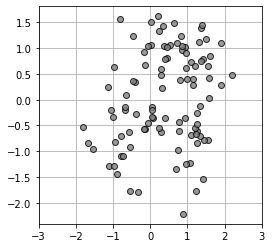

In [6]:
plt.figure(2, figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.xlim(X_range1)
plt.show()

import os
try:
  os.mkdir("./plt_data")
except:
  pass

np.savez('plt_data/data_ch7.npz', X=X, X_range0=X_range0, X_range1 = X_range1)

In [7]:
# 데이터 그리는 함수
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포 묘사하기
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                marker = 'o', markerfacecolor = X_col[k], markeredgecolor='k',
                markersize = 6, alpha = 0.5, linestyle = 'none')
        # 데이터의 평균을 '별표'로 묘사하기
        plt.plot(mu[k, 0], mu[k, 1], marker = '*',
                markerfacecolor = X_col[k], markersize = 15,
                markeredgecolor = 'k', markeredgewidth = 1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

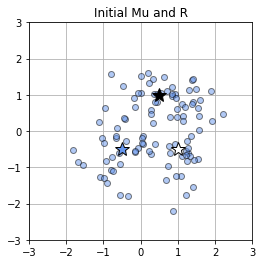

In [8]:
#fihure size 설정 및 위의 함수 불러오는건데 에러뜸 왜뜨지
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N ,1)),np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('Initial Mu and R')
plt.show()

In [15]:
#r을 정하는것
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N,K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0])**2 + (x1[n] - mu[k,1])**2
            print(f'wk[{k}] = \nx0[{n}] : {x0[n]} - mu[{k},0] : {mu[k,0]}')
        r[n, np.argmin(wk)] = 1
    print(f'r : {r}')
    return r

wk[0] = 
x0[0] : -0.14173827091891422 - mu[0,0] : -0.5
wk[1] = 
x0[0] : -0.14173827091891422 - mu[1,0] : 0.5
wk[2] = 
x0[0] : -0.14173827091891422 - mu[2,0] : 1.0
wk[0] = 
x0[1] : 1.895849411373184 - mu[0,0] : -0.5
wk[1] = 
x0[1] : 1.895849411373184 - mu[1,0] : 0.5
wk[2] = 
x0[1] : 1.895849411373184 - mu[2,0] : 1.0
wk[0] = 
x0[2] : -1.1019346247138375 - mu[0,0] : -0.5
wk[1] = 
x0[2] : -1.1019346247138375 - mu[1,0] : 0.5
wk[2] = 
x0[2] : -1.1019346247138375 - mu[2,0] : 1.0
wk[0] = 
x0[3] : 0.29363860963480615 - mu[0,0] : -0.5
wk[1] = 
x0[3] : 0.29363860963480615 - mu[1,0] : 0.5
wk[2] = 
x0[3] : 0.29363860963480615 - mu[2,0] : 1.0
wk[0] = 
x0[4] : 1.5741461162707133 - mu[0,0] : -0.5
wk[1] = 
x0[4] : 1.5741461162707133 - mu[1,0] : 0.5
wk[2] = 
x0[4] : 1.5741461162707133 - mu[2,0] : 1.0
wk[0] = 
x0[5] : 1.2702567847793236 - mu[0,0] : -0.5
wk[1] = 
x0[5] : 1.2702567847793236 - mu[1,0] : 0.5
wk[2] = 
x0[5] : 1.2702567847793236 - mu[2,0] : 1.0
wk[0] = 
x0[6] : 0.688588370637155 - mu[0,0] : -0

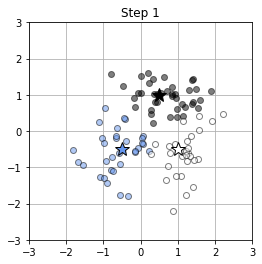

In [16]:
# 출력
plt.figure(figsize=(4,4))
R = step1_kmeans(X[:, 0], X[:,1],Mu)
step1 = show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

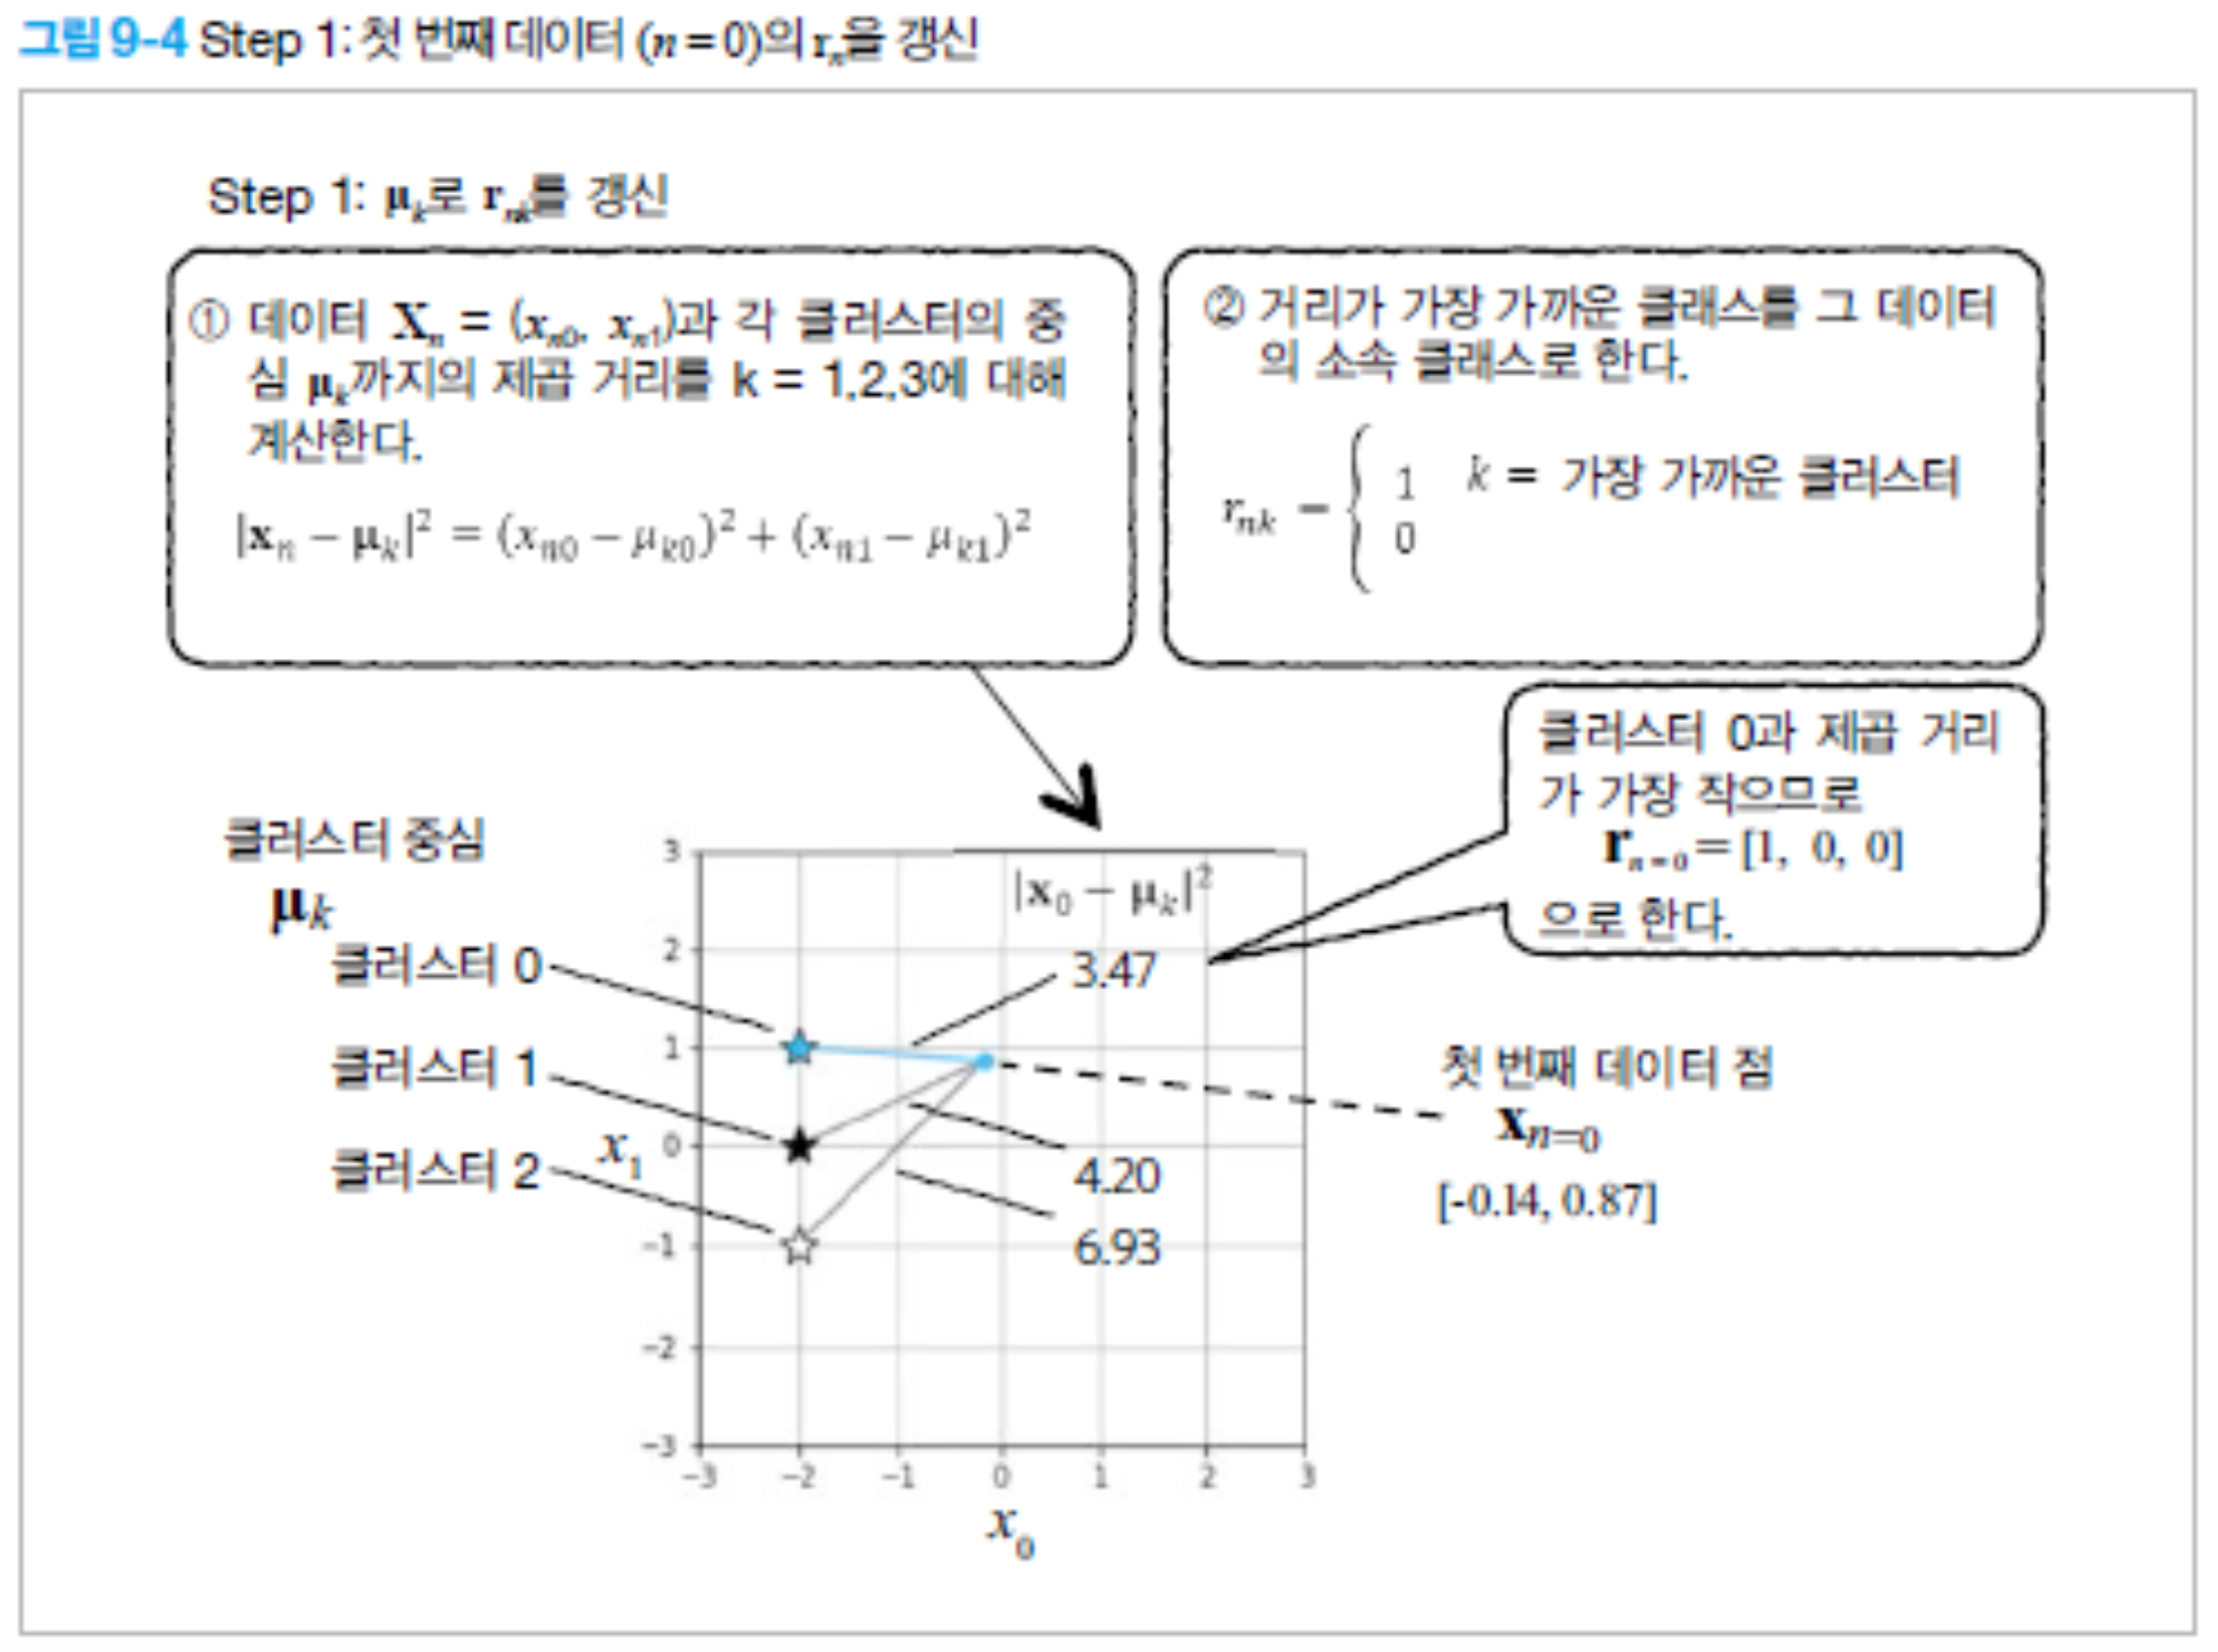

In [95]:
#Mu 결정(Step 2)
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    for k in range(K):
        mu[k,0] = np.sum(r[:,k]* x0) / np.sum(r[:,k])
        print(f'mu[{k},0] : {mu[k,0]} \n')
        mu[k,1] = np.sum(r[:,k]* x1) / np.sum(r[:,k])
        print(f'mu[{k},1] : {mu[k,1]}')
    print(f'\nmu : {mu}')
    return mu

mu[0,0] : -0.641342815597184 

mu[0,1] : -0.55321153793024
mu[1,0] : 0.7236414768628441 

mu[1,1] : 0.9348163692844832
mu[2,0] : 1.1579692679162896 

mu[2,1] : -0.7054118753129889

mu : [[-0.64134282 -0.55321154]
 [ 0.72364148  0.93481637]
 [ 1.15796927 -0.70541188]]


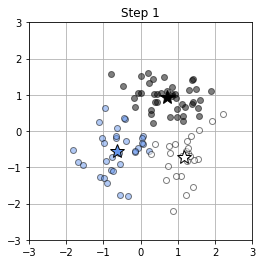

In [96]:
plt.figure(figsize=(4,4))
Mu = step2_kmeans(X[:,0],X[:,1],R)
step2 = show_prm(X,R,Mu,X_col)
plt.title('Step 1')
plt.show()